In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

## FOLIUM:

Folium is a powerful Python library that helps you create several types of Leaflet maps. By default, Folium creates a map in a separate HTML file.

#### Advantages
Folium makes easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. folium supports both Image, Video, GeoJSON and TopoJSON overlays.

#### Starting point

Folium.Map(location = [LAT0,LON0], zoom_start = 12)

location has a specific coordinates and zoom shows the distance from the coordinate.


In [2]:
!pip install folium
!pip install branca

In [3]:
import pandas as pd
#from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

import folium as fm
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap, StripePattern

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString


import branca as br 

## Mining Data

In [4]:
#Gettting the character format

base = open(r'../_data/Folium/MINING.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc


'UTF-8-SIG'

In [5]:
# Geographical information of mining
# Datos abiertos Peru: Directorio Mineros. Las minas pueden tener varias unidades en una mismo región-provincia-distrito
#Recomiendan utilizar siempre encodding. 
MINING = pd.read_csv( r'../_data/Folium/MINING.csv', encoding = charenc) 
MINING

UBIGEO  MÉTODO DE EXPLOTACIÓN                                   TITULAR  \
0     20201    MINERÍA SUBTERRÁNEA               COMPAÑIA MINERA LINCUNA S.A   
1    220902    MINERíA NO METÁLICA                              QUIMPAC S.A.   
2    200502    MINERíA NO METÁLICA  COMPAÑIA MINERA AGREGADOS CALCAREOS S.A.   
3    210802    MINERÍA SUBTERRÁNEA                               MINSUR S.A.   
4    150502    MINERíA NO METÁLICA         COMPAÑIA MINERA LAS CAMELIAS S.A.   
..      ...                    ...                                       ...   
137  120810    MINERÍA SUBTERRÁNEA             COMPAÑIA MINERA ARGENTUM S.A.   
138  120810    MINERÍA SUBTERRÁNEA             VOLCAN COMPAÑÍA MINERA S.A.A.   
139  120810    MINERíA NO METÁLICA                 MINERA CHINALCO PERU S.A.   
140   60508    MINERíA NO METÁLICA                 CEMENTOS PACASMAYO S.A.A.   
141   40128    MINERíA NO METÁLICA                                 YURA S.A.   

                   UNIDAD      REGION   PROVINCIA        DISTRITO  \
0              HUANCAPETI      ANCASH        AIJA            AIJA   
1        SALINAS PILLUANA  SAN MARTIN  SAN MARTIN  ALBERTO LEVEAU   
2            CERRO BLANCO       PIURA       PAITA         AMOTAPE   
3    QUENAMARI-SAN RAFAEL        PUNO      MELGAR         ANTAUTA   
4             PROMESA 345        LIMA      CAÑETE            ASIA   
..                    ...         ...         ...             ...   
137             MANUELITA       JUNIN       YAULI           YAULI   
138         SAN CRISTOBAL       JUNIN       YAULI           YAULI   
139            TUNSHURUCO       JUNIN       YAULI           YAULI   
140            TEMBLADERA   CAJAMARCA   CONTUMAZA           YONAN   
141                  YURA    AREQUIPA    AREQUIPA            YURA   

                            PRODUCTO   LONGITUD    LATITUD  
0         As, Bi, Mn, Pb, Zn, Au, Ag -77.531000  -9.753000  
1                                Sal -76.267000  -6.742000  
2                          Bentonita -81.027000  -4.836000  
3                                 Sn -70.491600 -14.133500  
4                           Arcillas -76.530467 -12.736480  
..                               ...        ...        ...  
137                   Pb, Zn, Ag, Cu -76.096077 -11.628891  
138                   Cu, Pb, Zn, Ag -75.484539 -12.018773  
139                           Caliza -76.139792 -11.656098  
140                           Caliza -79.124000  -7.247000  
141  Caliza, Pizarra, Puzolana, Yeso -71.778723 -16.206498  

[142 rows x 10 columns]

In [6]:
# Mining activities in Yauli - Junín
MINING1 = MINING[MINING.DISTRITO == "YAULI"]
MINING1

UBIGEO  MÉTODO DE EXPLOTACIÓN                         TITULAR  \
134  120810    MINERÍA SUBTERRÁNEA  COMPAÑIA MINERA CASAPALCA S.A.   
135  120810    MINERÍA SUBTERRÁNEA   COMPAÑIA MINERA ARGENTUM S.A.   
136  120810    MINERÍA SUBTERRÁNEA   VOLCAN COMPAÑÍA MINERA S.A.A.   
137  120810    MINERÍA SUBTERRÁNEA   COMPAÑIA MINERA ARGENTUM S.A.   
138  120810    MINERÍA SUBTERRÁNEA   VOLCAN COMPAÑÍA MINERA S.A.A.   
139  120810    MINERíA NO METÁLICA       MINERA CHINALCO PERU S.A.   

            UNIDAD REGION PROVINCIA DISTRITO        PRODUCTO   LONGITUD  \
134      AMERICANA  JUNIN     YAULI    YAULI  Zn, Ag, Cu, Pb -76.199576   
135       ANTICONA  JUNIN     YAULI    YAULI  Zn, Ag, Cu, Pb -76.171596   
136     CARAHUACRA  JUNIN     YAULI    YAULI  Zn, Ag, Cu, Pb -76.070389   
137      MANUELITA  JUNIN     YAULI    YAULI  Pb, Zn, Ag, Cu -76.096077   
138  SAN CRISTOBAL  JUNIN     YAULI    YAULI  Cu, Pb, Zn, Ag -75.484539   
139     TUNSHURUCO  JUNIN     YAULI    YAULI          Caliza -76.139792   

       LATITUD  
134 -11.698612  
135 -11.637246  
136 -11.740413  
137 -11.628891  
138 -12.018773  
139 -11.656098

In [7]:
# # Loop to save coordinates from mining location

# for j in range(0,len(MINING1)):
#     globals()[f'LON{j}'] = MINING1.iloc[j,8]
#     globals()[f'LAT{j}'] = MINING1.iloc[j,9]

In [8]:
#LAT1

## 1. First Map and some additional details

### 1.1 Define the first parameters

In [9]:
# Se establece el nivel de zoom inicial del mapa
zoom_start = 12

# Se calculan las coordenadas del centro del mapa utilizando el promedio de las coordenadas de las ubicaciones de minería (supongo que MINING1 es un DataFrame)
lat_mining = MINING1["LATITUD"].mean()
long_mining = MINING1["LONGITUD"].mean()

# Control_scales ayuda a visualizar la escala del mapa. Se recomienda habilitar control_scale siempre.
# Esto solo define el centroide del mapa y algunos parámetros iniciales.
a = fm.Map(location=[lat_mining, long_mining], tiles="OpenStreetMap", zoom_start=zoom_start, control_scale=True)
# Comentario: Se crea un objeto de mapa utilizando Folium. La ubicación inicial del mapa se establece en el centroide calculado.
# El tipo de mosaico (tiles) se establece en "OpenStreetMap", y el nivel de zoom inicial es 12. También se habilita la escala de control.

# Finalmente, el objeto 'a' que representa el mapa se muestra.
a


### Add Markers

In [10]:
# Definición del tooltip que aparecerá al pasar el cursor sobre los marcadores
tooltip = "Click me!"

# Creación del primer marcador en el mapa (objeto 'a')
fm.Marker([-11.637246, -76.171596], 
          popup="<i>COMPAÑIA MINERA CASAPALCA S.A.</i>", 
          tooltip=tooltip).add_to(a)
# Comentario: Se crea un marcador en las coordenadas específicas con un contenido emergente en cursiva y el mismo tooltip para ambos marcadores.

# Creación del segundo marcador en el mismo mapa (objeto 'a')
fm.Marker([-11.628891, -76.096077], 
          popup="<b><i>COMPAÑIA MINERA ARGENTUM S.A.</i></b>", 
          tooltip=tooltip).add_to(a)
# Comentario: Se agrega otro marcador en diferentes coordenadas con un contenido emergente en negrita y cursiva, pero el mismo tooltip.

# En este punto, el objeto 'a' probablemente contiene ambos marcadores con sus respectivas propiedades.


### Ballon Marker

In [11]:
#Para buscar colores puedes utilizar color picker
# Itera sobre cada fila del DataFrame MINING1 para crear marcadores en el mapa.
for index, row in MINING1.iterrows():
    
    # Crea un marcador en las coordenadas especificadas por LATITUD y LONGITUD de cada fila.
    fm.Marker([row['LATITUD'], row['LONGITUD']], 
              # Establece el contenido emergente del marcador con el valor de la columna 'TITULAR'.
              popup=row['TITULAR'],
              # Establece el radio del marcador en 50.
              radius=50,
              # Establece el icono del marcador con un color rojo e ícono "info-sign".
              icon=fm.Icon(color="red", icon="info-sign"),
              # Establece el color del borde del marcador.
              color="#3186cc",
              # Habilita el relleno del marcador.
              fill=True,
              # Establece el color de relleno del marcador.
              fill_color="#3186cc",
              # Establece el tooltip del marcador utilizando el valor previamente definido en la variable 'tooltip'.
              tooltip=tooltip
              ).add_to(a)

# Muestra el mapa con los marcadores creados.
a


### Circle Marker

In [12]:
tooltip = "Click"

#Mineral type in a list 

#mineral = ["CASAPALCA (Zinc)","ARGENTUM (Cobre)","VOLCAN (Mercurio)", "ARGENTUM (Plomo)", "VOLCAN (Plata)", "CHINALCO (Caliza)"]

# Adding circle and mark. 
# popup save information 
# CircleMarker uses Pixels: fm.Circle es el que cambia.
for _, row in MINING1.iterrows():
    
    fm.Circle([row['LATITUD'], row['LONGITUD']], popup=row['TITULAR'],
              radius = 10000,
              fill=True,
              fill_color="#3186cc",
              tooltip=tooltip).add_to(a)
a

In [13]:
# tooltip = "Click"

# #Mineral type in a list 

# mineral = ["CASAPALCA (Zinc)","ARGENTUM (Cobre)","VOLCAN (Mercurio)", "ARGENTUM (Plomo)", "VOLCAN (Plata)", "CHINALCO (Caliza)"]

# # Adding circle and mark. 
# # popup save information 

# for i in range(0,len(MINING1)):
#     fm.CircleMarker([globals()[f'LAT{i}'], globals()[f'LON{i}']], popup= mineral[i],
#               radius = 100,
#               fill=True,
#               fill_color="#3186cc",
#               tooltip=tooltip).add_to(a)

# for i in range(0,len(MINING1)):
#     fm.Marker([globals()[f'LAT{i}'], globals()[f'LON{i}']], popup= mineral[i],
#           radius = 50,
#           icon=fm.Icon(color="red", icon="info-sign"),
#           color="#3186cc",  
#           fill=True,
#           fill_color="#3186cc",
#           tooltip=tooltip).add_to(a)
# a

### Using a Different Tiles. 
http://leaflet-extras.github.io/leaflet-providers/preview/index.html

In [44]:
zoom_start = 10
lat_mining = MINING1["LATITUD"].mean()
long_mining = MINING1["LONGITUD"].mean()

# "cartodbpositron"
a = fm.Map(location = [lat_mining, long_mining], tiles="cartodbpositron", zoom_start = zoom_start, control_scale=True)

# b. Set the markers 
for index, row in MINING1.iterrows():
    fm.Marker([row['LATITUD'], row['LONGITUD']], popup= row['TITULAR'],
          radius = 50,
          icon=fm.Icon(color="red", icon="info-sign"), #icon se puede cambiar por otros íconos que sean de free access
          color="#3186cc",  
          fill=True,
          fill_color="#3186cc",
          tooltip=tooltip).add_to(a)

# Circles
for _, row in MINING1.iterrows():
    
    fm.Circle([row['LATITUD'], row['LONGITUD']], popup=row['TITULAR'],
              radius = 10000,
              fill=True,
              fill_color="#3186cc",
              tooltip=tooltip).add_to(a)

a 

## Peru GeoJson Files

### District Level

In [15]:
# Yoy must upload coordinates base on GeoJson format to use package Choropleth. 

distritos = gpd.read_file(r'../_data/folium/peru_distrital_simple.geojson')
distritos

OBJECTID  IDDIST IDDPTO IDPROV                              NOMBDIST  \
0            1  230110     23   2301  CORONEL GREGORIO ALBARRACIN LANCHIPA   
1            2  230108     23   2301                              POCOLLAY   
2            3  230103     23   2301                                CALANA   
3            4  230101     23   2301                                 TACNA   
4            5  230109     23   2301                                  SAMA   
...        ...     ...    ...    ...                                   ...   
1829      1830  160303     16   1603                                 TIGRE   
1830      1831  160107     16   1601                                  NAPO   
1831      1832  160109     16   1601                              PUTUMAYO   
1832      1833  160110     16   1601                        TORRES CAUSANA   
1833      1834  160114     16   1601               TENIENTE MANUEL CLAVERO   

     NOMBPROV NOMBDEP DCTO    LEY         FECHA                   NOM_CAP  \
0       TACNA   TACNA  LEY  27415    02/02/2001            ALFONSO UGARTE   
1       TACNA   TACNA  LEY  13069    15/01/1959                  POCOLLAY   
2       TACNA   TACNA  LEY    S/N    20/08/1872                    CALANA   
3       TACNA   TACNA    -      -  EPOCA INDEP.                     TACNA   
4       TACNA   TACNA    -      -  EPOCA INDEP.                 LAS YARAS   
...       ...     ...  ...    ...           ...                       ...   
1829   LORETO  LORETO  LEY   9815    02/07/1943                    INTUTU   
1830   MAYNAS  LORETO  LEY   9815    02/07/1943            SANTA CLOTILDE   
1831   MAYNAS  LORETO  LEY   9815    02/07/1943  SAN ANTONIO DEL ESTRECHO   
1832   MAYNAS  LORETO  LEY   9815    02/07/1943                   PANTOJA   
1833   MAYNAS  LORETO  LEY  28362    19/10/2004             S0PLIN VARGAS   

      SHAPE_LENG  SHAPE_AREA  SHAPE_LE_1  SHAPE_AR_1  AREA_MINAM  \
0       0.570510    0.016140    0.570195    0.015990    18834.14   
1       0.883871    0.022816    0.897169    0.022961    27073.52   
2       0.446736    0.009458    0.445963    0.009383    11063.99   
3       2.758951    0.209156    2.758123    0.209177   246365.27   
4       1.515506    0.096789    1.513660    0.096766   113953.51   
...          ...         ...         ...         ...         ...   
1829    9.211057    1.637168    9.179725    1.637432  2011378.30   
1830   11.380550    1.986357   11.359436    1.985362  2440805.01   
1831   16.256407    2.884865   16.232424    2.884722  3555516.31   
1832    6.592491    0.609698    6.572157    0.609290   749185.08   
1833    7.442130    0.742758    7.429279    0.741488   911972.65   

                                               geometry  
0     POLYGON ((-70.14409 -18.09309, -70.17512 -18.1...  
1     POLYGON ((-69.90467 -17.95829, -69.98287 -18.0...  
2     POLYGON ((-70.09201 -17.98026, -70.17243 -18.0...  
3     POLYGON ((-70.23500 -17.99231, -70.23710 -18.0...  
4     POLYGON ((-70.42374 -17.88983, -70.51323 -17.9...  
...                                                 ...  
1829  POLYGON ((-74.96515 -2.36565, -74.94959 -2.458...  
1830  POLYGON ((-72.93790 -2.83906, -72.97311 -2.930...  
1831  POLYGON ((-73.53075 -1.45793, -73.47857 -1.522...  
1832  POLYGON ((-74.87370 -0.95012, -74.88779 -1.006...  
1833  POLYGON ((-73.53075 -1.45793, -73.58899 -1.460...  

[1834 rows x 17 columns]

In [16]:
distritos1 = distritos[['IDDIST', 'geometry']]
distritos1 = distritos1 .rename({'IDDIST':'UBIGEO1'}, axis =1 )
distritos1['UBIGEO1'] = distritos1['UBIGEO1'].astype(str).astype(np.int64)
distritos1

UBIGEO1                                           geometry
0      230110  POLYGON ((-70.14409 -18.09309, -70.17512 -18.1...
1      230108  POLYGON ((-69.90467 -17.95829, -69.98287 -18.0...
2      230103  POLYGON ((-70.09201 -17.98026, -70.17243 -18.0...
3      230101  POLYGON ((-70.23500 -17.99231, -70.23710 -18.0...
4      230109  POLYGON ((-70.42374 -17.88983, -70.51323 -17.9...
...       ...                                                ...
1829   160303  POLYGON ((-74.96515 -2.36565, -74.94959 -2.458...
1830   160107  POLYGON ((-72.93790 -2.83906, -72.97311 -2.930...
1831   160109  POLYGON ((-73.53075 -1.45793, -73.47857 -1.522...
1832   160110  POLYGON ((-74.87370 -0.95012, -74.88779 -1.006...
1833   160114  POLYGON ((-73.53075 -1.45793, -73.58899 -1.460...

[1834 rows x 2 columns]

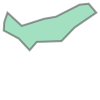

In [48]:
#Solo para checar el geometry:
distritos.geometry[1]

### Departamenta levels

In [51]:
#administrative regions 

dpto = gpd.read_file(r'../_data/folium/peru_departamental_simple.geojson')
dpto1 = dpto[['FIRST_IDDP', 'geometry']]
dpto1 = dpto1.rename({'FIRST_IDDP':'UBIGEO2'}, axis =1 )
dpto1['UBIGEO2'] = dpto1['UBIGEO2'] + "0000"
dpto1['UBIGEO2'] = dpto1['UBIGEO2'].astype(str).astype(np.int64)
dpto1

UBIGEO2                                           geometry
0     10000  POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...
1     20000  POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...
2     30000  POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...
3     40000  POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...
4     50000  POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...
5     60000  POLYGON ((-79.32259 -7.02568, -79.29663 -6.999...
6     70000  POLYGON ((-77.18710 -11.82836, -77.12605 -11.8...
7     80000  POLYGON ((-72.47177 -14.66140, -72.46170 -14.6...
8     90000  POLYGON ((-75.05905 -14.12962, -75.10884 -14.0...
9    100000  POLYGON ((-77.31749 -8.53015, -77.26408 -8.467...
10   110000  POLYGON ((-74.76230 -15.09805, -74.81592 -15.1...
11   120000  POLYGON ((-74.57300 -10.91260, -74.50838 -10.9...
12   130000  POLYGON ((-78.64492 -8.96923, -78.65166 -8.914...
13   140000  POLYGON ((-80.62713 -6.37208, -80.37622 -6.006...
14   150000  POLYGON ((-76.90625 -10.27419, -76.85639 -10.3...
15   160000  POLYGON ((-73.98303 -7.53436, -74.03380 -7.484...
16   170000  POLYGON ((-70.38847 -13.19239, -70.46425 -13.1...
17   180000  POLYGON ((-71.13944 -17.82148, -71.20565 -17.7...
18   190000  POLYGON ((-76.27886 -10.92345, -76.24117 -11.0...
19   200000  POLYGON ((-79.21007 -4.96524, -79.24509 -5.001...
20   210000  MULTIPOLYGON (((-68.91839 -16.40372, -68.91840...
21   220000  POLYGON ((-75.98496 -8.32215, -76.08718 -8.336...
22   230000  POLYGON ((-69.64132 -17.28745, -69.57522 -17.2...
23   240000  POLYGON ((-80.48733 -4.08313, -80.52435 -4.107...
24   250000  POLYGON ((-70.61388 -9.91686, -70.66763 -9.972...

### Data to plot- IDH, GDP , Poverty Rate 

In [49]:
# Uplaoad economic indicators such us IDH, GDP per - capita, Poverty rate 

base = open(r'../_data/Folium/Poverty.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

poverty = pd.read_csv( r'../_data/Folium/Poverty.csv', encoding = charenc)
poverty

UBIGEO1  UBIGEO2 DEPARTAMENTO    PROVINCIA                  DISTRITO  \
0       10101    10000     AMAZONAS  CHACHAPOYAS               CHACHAPOYAS   
1       10102    10000     AMAZONAS  CHACHAPOYAS                  ASUNCIÓN   
2       10103    10000     AMAZONAS  CHACHAPOYAS                    BALSAS   
3       10104    10000     AMAZONAS  CHACHAPOYAS                     CHETO   
4       10105    10000     AMAZONAS  CHACHAPOYAS                 CHILIQUÍN   
...       ...      ...          ...          ...                       ...   
1868   250302   250000      UCAYALI   PADRE ABAD                 IRAZOLA     
1869   250303   250000      UCAYALI   PADRE ABAD                  CURIMANÁ   
1870   250304   250000      UCAYALI   PADRE ABAD                NESHUYA      
1871   250305   250000      UCAYALI   PADRE ABAD  ALEXANDER VON HUMBOLDT     
1872   250401   250000      UCAYALI        PURÚS                     PURÚS   

      POVERTY_RATE       PBI_PC   IDH  
0         9.034625  3449.564733  41.8  
1        36.519949  3449.564733  41.8  
2        45.732962  3449.564733  41.8  
3        39.169782  3449.564733  41.8  
4        53.045662  3449.564733  41.8  
...            ...          ...   ...  
1868     12.899560  4059.106491  48.4  
1869      9.014545  4059.106491  48.4  
1870     11.946857  4059.106491  48.4  
1871     12.899560  4059.106491  48.4  
1872     31.928338  4059.106491  48.4  

[1873 rows x 8 columns]

In [19]:
#Check variables´ types to make math operations, merge datasets, etc
poverty.dtypes

UBIGEO1           int64
UBIGEO2           int64
DEPARTAMENTO     object
PROVINCIA        object
DISTRITO         object
POVERTY_RATE    float64
PBI_PC           object
IDH              object
dtype: object

In [20]:
# From district level to administrative region

poverty2 = poverty.drop_duplicates(subset=['UBIGEO2'])
# Se eliminió el Callao
poverty2 = poverty2.drop(689)
poverty2['IDH'] = poverty2['IDH'].astype(str).astype(float)

In [21]:
poverty2['IDH'] = poverty2['IDH'].astype(str).astype(float)
poverty2['PBI_PC'] = poverty2['PBI_PC'].astype(str).astype(float)
poverty2

UBIGEO1  UBIGEO2   DEPARTAMENTO         PROVINCIA      DISTRITO  \
0       10101    10000       AMAZONAS       CHACHAPOYAS   CHACHAPOYAS   
84      20101    20000         ÁNCASH            HUARAZ        HUARAZ   
250     30101    30000       APURÍMAC           ABANCAY       ABANCAY   
334     40101    40000       AREQUIPA          AREQUIPA      AREQUIPA   
443     50101    50000       AYACUCHO          HUAMANGA   AYACUCHO      
562     60101    60000      CAJAMARCA         CAJAMARCA     CAJAMARCA   
696     80101    80000          CUSCO             CUSCO         CUSCO   
808     90101    90000   HUANCAVELICA      HUANCAVELICA  HUANCAVELICA   
908    100101   100000        HUÁNUCO           HUÁNUCO       HUANUCO   
992    110101   110000            ICA               ICA           ICA   
1035   120101   120000          JUNÍN          HUANCAYO      HUANCAYO   
1159   130101   130000    LA LIBERTAD          TRUJILLO      TRUJILLO   
1242   140101   140000     LAMBAYEQUE          CHICLAYO      CHICLAYO   
1280   150101   150000          LIMA               LIMA          LIMA   
1450   160101   160000         LORETO            MAYNAS     IQUITOS     
1503   170101   170000  MADRE DE DIOS         TAMBOPATA     TAMBOPATA   
1514   180101   180000       MOQUEGUA    MARISCAL NIETO      MOQUEGUA   
1534   190101   190000          PASCO             PASCO   CHAUPIMARCA   
1563   200101   200000          PIURA             PIURA         PIURA   
1628   210101   210000           PUNO              PUNO          PUNO   
1738   220101   220000     SAN MARTÍN         MOYOBAMBA     MOYOBAMBA   
1815   230101   230000          TACNA             TACNA      TACNA      
1843   240101   240000         TUMBES            TUMBES        TUMBES   
1856   250101   250000        UCAYALI  CORONEL PORTILLO      CALLERÍA   

      POVERTY_RATE        PBI_PC   IDH  
0         9.034625   3449.564733  41.8  
84       10.242455   3151.903885  51.6  
250      19.900498   6100.316981  41.1  
334       0.715245   9006.816781  64.3  
443      15.054646   3201.644414  43.3  
562      19.748740   2081.118853  42.5  
696       8.214426   3396.604469  51.2  
808      17.073401   2654.809240  38.4  
908      13.066336   2189.070100  45.4  
992       2.165357   7595.170228  60.0  
1035      6.563487   4473.586854  51.1  
1159      4.989521   3936.456002  54.8  
1242      7.491534   3849.700330  53.4  
1280      7.958984  13182.516370  70.7  
1450      8.626166   1505.223823  48.3  
1503      4.787605   4161.142764  61.4  
1514      7.023362   7244.112850  65.9  
1534     24.613999   2628.772378  47.8  
1563      9.786115   3092.914978  51.3  
1628     12.829234   2441.895177  46.6  
1738     16.339630   2433.887759  48.3  
1815      7.691274   5080.827164  59.0  
1843      8.706752   2200.674031  55.5  
1856      6.229848   4059.106491  48.4

## 2. Choropleth 

In [22]:
poverty

UBIGEO1  UBIGEO2 DEPARTAMENTO    PROVINCIA                  DISTRITO  \
0       10101    10000     AMAZONAS  CHACHAPOYAS               CHACHAPOYAS   
1       10102    10000     AMAZONAS  CHACHAPOYAS                  ASUNCIÓN   
2       10103    10000     AMAZONAS  CHACHAPOYAS                    BALSAS   
3       10104    10000     AMAZONAS  CHACHAPOYAS                     CHETO   
4       10105    10000     AMAZONAS  CHACHAPOYAS                 CHILIQUÍN   
...       ...      ...          ...          ...                       ...   
1868   250302   250000      UCAYALI   PADRE ABAD                 IRAZOLA     
1869   250303   250000      UCAYALI   PADRE ABAD                  CURIMANÁ   
1870   250304   250000      UCAYALI   PADRE ABAD                NESHUYA      
1871   250305   250000      UCAYALI   PADRE ABAD  ALEXANDER VON HUMBOLDT     
1872   250401   250000      UCAYALI        PURÚS                     PURÚS   

      POVERTY_RATE       PBI_PC   IDH  
0         9.034625  3449.564733  41.8  
1        36.519949  3449.564733  41.8  
2        45.732962  3449.564733  41.8  
3        39.169782  3449.564733  41.8  
4        53.045662  3449.564733  41.8  
...            ...          ...   ...  
1868     12.899560  4059.106491  48.4  
1869      9.014545  4059.106491  48.4  
1870     11.946857  4059.106491  48.4  
1871     12.899560  4059.106491  48.4  
1872     31.928338  4059.106491  48.4  

[1873 rows x 8 columns]

In [23]:
# government palace coordinates

lat_palacio = -12.0757538
long_palacio = -76.9863174
zoom_start = 5

z = fm.Map(location = [lat_palacio, long_palacio], tiles='cartodbpositron', zoom_start = zoom_start)

# Mandatory: geo_data in GeoJson format
# columns: variables from economics indicators data set
# Atention !!! key_on: commom variable between geodata and data "feature.properties.(name of variable)"


fm.Choropleth(
    geo_data=distritos1,
    data=poverty,
    columns=['UBIGEO1', 'POVERTY_RATE'],
    key_on="feature.properties.UBIGEO1",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Poverty Rate (%)",
    smooth_factor=0,
    Highlight= True,
    line_color = "#0000",
    overlay=True,
    nan_fill_color = "White"  # fill white missing values 
    ).add_to(z)

#fm.LayerControl().add_to(z)

# Save in a html format 

#z.save("Poverty_Map.html")

z

In [24]:
# Add quantile on legend 
bins = list(poverty2["IDH"].quantile([0, 0.2, 0.4, 0.6,0.8, 1]))
bins

[38.4, 44.56, 48.32, 51.54, 59.400000000000006, 70.7]

In [25]:
lat_palacio = -12.0757538
long_palacio = -76.9863174

z = fm.Map(location = [lat_palacio, long_palacio], zoom_start = 5)



fm.Choropleth(geo_data=dpto1,
            data=poverty2,
            columns=["UBIGEO2", "IDH"],
            key_on="feature.properties.UBIGEO2",
            fill_color="Reds",  
            fill_opacity=0.8,
            legend_name="Human development index",
            bins = bins,
            reset = True
            ).add_to(z)

fm.LayerControl().add_to(z)

z

z.save("IDH_map_peru.html")

In [26]:
lat_palacio = -12.0757538
long_palacio = -76.9863174


#add quantils

bins = list(poverty2["IDH"].quantile([0, 0.2, 0.4, 0.6,0.8, 1]))

z = fm.Map(location = [lat_palacio, long_palacio], zoom_start = 5)

fm.Choropleth(geo_data=dpto1,
            data=poverty2,
            columns=["UBIGEO2", "IDH"],
            key_on="feature.properties.UBIGEO2",
            fill_color="Reds",  
            fill_opacity=0.8,
            legend_name="Human development index",
            bins = bins,
            reset = True
            ).add_to(z)

#Merge both dataset to add informaction by region 
data_both = pd.merge(dpto1, poverty2, how="inner", on="UBIGEO2")
data_both = data_both.to_json()    # from pandas to Json 

# Color and opacity of each region 
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

# Color and opacity of each selected region 

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.5, 
                                'weight': 0.1}

details = fm.features.GeoJson(
    data = data_both,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=fm.features.GeoJsonTooltip(
        fields=['DEPARTAMENTO','IDH'],   #Variable selection
        aliases=['Administrative Region', 'Human Development Index'],  # renames
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

# Add new features 

z.add_child(details)
z.keep_in_front(details)

z

## 3. Heat Map and Interactive Map

In [27]:
#Gettting the character format

base = open(r'../_data/Folium/enaho.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

ENAHO = pd.read_csv( r'../_data/Folium/enaho.csv', encoding = charenc)
ENAHO

conglome  vivienda  hogar  dominio  registro_sunarp  nbi1  nbi2  nbi3  \
0         6024         1     11        8              NaN     0     0     0   
1         6024        15     11        8              1.0     0     0     0   
2         6024        27     11        8              1.0     0     0     0   
3         6024        41     11        8              2.0     0     0     0   
4         6024        68     11        8              1.0     0     0     0   
...        ...       ...    ...      ...              ...   ...   ...   ...   
4063     18524       338     11        8              NaN     0     0     0   
4064     18524       341     11        8              NaN     0     0     0   
4065     18524       440     11        8              NaN     0     0     0   
4066     18524       452     11        8              NaN     0     0     0   
4067     18524       462     11        8              NaN     0     0     0   

      nbi4  nbi5   longitud    latitud  prog_mujer  prog_juntos  prog_juvenil  \
0        0     0 -77.133652 -11.825158         0.0          0.0           0.0   
1        0     0 -77.133652 -11.825158         0.0          0.0           0.0   
2        0     0 -77.133652 -11.825158         0.0          0.0           0.0   
3        0     0 -77.133652 -11.825158         0.0          0.0           0.0   
4        0     0 -77.133652 -11.825158         0.0          0.0           0.0   
...    ...   ...        ...        ...         ...          ...           ...   
4063     0     0 -76.981087 -11.797198         0.0          0.0           0.0   
4064     0     0 -76.981087 -11.797198         0.0          0.0           0.0   
4065     0     0 -76.981087 -11.797198         0.0          0.0           0.0   
4066     0     0 -76.981087 -11.797198         0.0          0.0           0.0   
4067     0     1 -76.981087 -11.797198         0.0          0.0           0.0   

      beca18  bonogas  bono_ind  bono_uni  retiro_afp  
0        0.0      0.0       0.0       0.0         1.0  
1        0.0      0.0       0.0       0.0         0.0  
2        0.0      0.0       0.0       0.0         0.0  
3        0.0      1.0       0.0       1.0         1.0  
4        0.0      0.0       0.0       1.0         0.0  
...      ...      ...       ...       ...         ...  
4063     0.0      1.0       0.0       0.0         0.0  
4064     0.0      0.0       0.0       0.0         0.0  
4065     0.0      0.0       0.0       1.0         0.0  
4066     0.0      0.0       0.0       0.0         0.0  
4067     0.0      0.0       0.0       0.0         0.0  

[4068 rows x 20 columns]

In [28]:
# beneficiary households of the universal bond 
bono_uni= ENAHO[ENAHO.bono_uni == 1]
bono_uni

conglome  vivienda  hogar  dominio  registro_sunarp  nbi1  nbi2  nbi3  \
3         6024        41     11        8              2.0     0     0     0   
4         6024        68     11        8              1.0     0     0     0   
5         6024       108     11        8              1.0     0     0     0   
21        6027       101     11        8              NaN     1     0     0   
32        6029        92     11        8              NaN     0     0     0   
...        ...       ...    ...      ...              ...   ...   ...   ...   
4052     18512        52     11        8              NaN     0     0     0   
4056     18512        98     11        8              NaN     0     0     1   
4060     18524         3     11        8              NaN     0     0     0   
4061     18524         5     11        8              NaN     0     0     0   
4065     18524       440     11        8              NaN     0     0     0   

      nbi4  nbi5   longitud    latitud  prog_mujer  prog_juntos  prog_juvenil  \
3        0     0 -77.133652 -11.825158         0.0          0.0           0.0   
4        0     0 -77.133652 -11.825158         0.0          0.0           0.0   
5        0     0 -77.133652 -11.825158         0.0          0.0           0.0   
21       0     0 -77.138649 -11.830967         0.0          0.0           0.0   
32       0     0 -77.129189 -11.841843         0.0          0.0           0.0   
...    ...   ...        ...        ...         ...          ...           ...   
4052     0     0 -77.039070 -11.836553         0.0          0.0           0.0   
4056     0     1 -77.039070 -11.836553         0.0          0.0           0.0   
4060     0     0 -76.981087 -11.797198         0.0          0.0           0.0   
4061     0     0 -76.981087 -11.797198         0.0          0.0           0.0   
4065     0     0 -76.981087 -11.797198         0.0          0.0           0.0   

      beca18  bonogas  bono_ind  bono_uni  retiro_afp  
3        0.0      1.0       0.0       1.0         1.0  
4        0.0      0.0       0.0       1.0         0.0  
5        0.0      0.0       0.0       1.0         0.0  
21       0.0      0.0       0.0       1.0         0.0  
32       0.0      0.0       0.0       1.0         0.0  
...      ...      ...       ...       ...         ...  
4052     0.0      0.0       0.0       1.0         1.0  
4056     0.0      0.0       0.0       1.0         0.0  
4060     0.0      0.0       0.0       1.0         0.0  
4061     0.0      0.0       0.0       1.0         0.0  
4065     0.0      0.0       0.0       1.0         0.0  

[432 rows x 20 columns]

In [29]:
# Coordinamtes in a list 
hogares = list(zip(bono_uni['latitud'], bono_uni['longitud']))
hogares

[(-11.825158, -77.133652),
 (-11.825158, -77.133652),
 (-11.825158, -77.133652),
 (-11.830967, -77.138649),
 (-11.841843, -77.129189),
 (-11.835294, -77.125313),
 (-11.835294, -77.125313),
 (-11.835294, -77.125313),
 (-11.85587, -77.117348),
 (-11.866288, -77.118408),
 (-11.866288, -77.118408),
 (-11.872937, -77.117737),
 (-11.894818, -77.132561),
 (-11.894818, -77.132561),
 (-11.895302, -77.129555),
 (-11.895302, -77.129555),
 (-11.825249, -77.146538),
 (-11.825249, -77.146538),
 (-11.828746, -77.143715),
 (-11.830252, -77.149582),
 (-11.830252, -77.149582),
 (-11.830252, -77.149582),
 (-11.840626, -77.15567),
 (-11.840626, -77.15567),
 (-11.84774, -77.154228),
 (-11.851333, -77.140404),
 (-11.851333, -77.140404),
 (-11.847133, -77.13662),
 (-11.848764, -77.127312),
 (-11.857316, -77.140007),
 (-12.043663, -77.097336),
 (-12.041523, -77.090256),
 (-12.041523, -77.090256),
 (-12.06623, -77.131691),
 (-12.0583, -77.115837),
 (-12.0583, -77.115837),
 (-12.0583, -77.115837),
 (-12.0583, -

In [30]:
# List of tiles 
z = fm.Map(location = [lat_palacio, long_palacio], zoom_start = 12)

# Cluster Map
MarkerCluster( hogares, name = 'Cluster' ).add_to(z)
z

In [31]:
# Heat Map 
HeatMap(data=bono_uni[['latitud', 'longitud']], radius=20, name = 'Heatmap').add_to(z)
z

In [32]:
#Add different kind of tiles 
Tiles = ["stamenterrain","stamenwatercolor","cartodbpositron","openstreetmap", "cartodbdark_matter"]

for i in Tiles:
    fm.TileLayer(i, name = i, control = True).add_to(z)
    
fm.LayerControl(collapsed=False).add_to(z)

z.save("cluster_heatmap_bono.html")
z


In [33]:
# beneficiary households of the universal bond 
bono_uni= ENAHO[ENAHO.bono_uni == 1]

# Coordinamtes in a list 

hogares = list(zip(bono_uni['latitud'], bono_uni['longitud']))

# List of tiles 

Tiles = ["stamenterrain","stamenwatercolor","cartodbpositron","openstreetmap", "cartodbdark_matter"]

z = fm.Map(location = [lat_palacio, long_palacio], zoom_start = 12)


# Heat Map 
HeatMap(data=bono_uni[['latitud', 'longitud']], radius=20, name = 'Heatmap').add_to(z)

# Cluster Map
MarkerCluster(hogares, name = 'Cluster').add_to(z)

#Add different kind of tiles 

for i in Tiles:
    fm.TileLayer(i, name = i, control = True).add_to(z)
    
fm.LayerControl(collapsed=False).add_to(z)
z.save("cluster_heatmap_bono.html")

## 4. Marker

In [34]:
bonogas = ENAHO[ENAHO.bonogas == 1]

bn = fm.Map(location = [lat_palacio, long_palacio], zoom_start = 12, control_scale=True)

# Loop for rows

for idx, row in bonogas.iterrows():
    Marker([row['latitud'], row['longitud']]).add_to(bn)

bn

## 5. Circles

In [35]:
base1 = ENAHO[ENAHO['nbi1'] == 1]
base2 = ENAHO[ENAHO['nbi2'] == 1]
base3 = ENAHO[ENAHO['nbi3'] == 1]
base4 = ENAHO[ENAHO['nbi4'] == 1]
base5 = ENAHO[ENAHO['nbi5'] == 1]

In [36]:
globals()["base1"]

conglome  vivienda  hogar  dominio  registro_sunarp  nbi1  nbi2  nbi3  \
21        6027       101     11        8              NaN     1     0     0   
35        6032        87     11        8              1.0     1     0     0   
128       6057        16     11        8              NaN     1     0     0   
132       6057        96     11        8              NaN     1     0     0   
506       6152        46     11        8              NaN     1     0     0   
...        ...       ...    ...      ...              ...   ...   ...   ...   
4010     18210        16     11        8              1.0     1     0     0   
4037     18215       115     11        8              NaN     1     0     1   
4053     18512        90     11        8              NaN     1     0     0   
4059     18512       124     11        8              NaN     1     0     0   
4062     18524       335     11        8              NaN     1     0     0   

      nbi4  nbi5   longitud    latitud  prog_mujer  prog_juntos  prog_juvenil  \
21       0     0 -77.138649 -11.830967         0.0          0.0           0.0   
35       0     0 -77.128754 -11.836511         0.0          0.0           0.0   
128      0     0 -77.124878 -11.897841         0.0          0.0           0.0   
132      0     0 -77.124878 -11.897841         0.0          0.0           0.0   
506      0     0 -77.144478 -12.059699         0.0          0.0           0.0   
...    ...   ...        ...        ...         ...          ...           ...   
4010     0     0 -76.928871 -12.239233         0.0          0.0           0.0   
4037     0     0 -76.950340 -12.125921         0.0          0.0           0.0   
4053     0     0 -77.039070 -11.836553         0.0          0.0           0.0   
4059     0     0 -77.039070 -11.836553         0.0          0.0           0.0   
4062     0     0 -76.981087 -11.797198         0.0          0.0           0.0   

      beca18  bonogas  bono_ind  bono_uni  retiro_afp  
21       0.0      0.0       0.0       1.0         0.0  
35       0.0      0.0       0.0       0.0         0.0  
128      0.0      0.0       0.0       0.0         0.0  
132      0.0      0.0       0.0       0.0         0.0  
506      0.0      0.0       0.0       0.0         0.0  
...      ...      ...       ...       ...         ...  
4010     0.0      0.0       0.0       0.0         0.0  
4037     0.0      0.0       0.0       0.0         0.0  
4053     0.0      0.0       0.0       0.0         0.0  
4059     0.0      0.0       0.0       0.0         0.0  
4062     0.0      0.0       0.0       0.0         0.0  

[75 rows x 20 columns]

In [37]:
#unsatisfied basic need

#nbi1: Inadequate housing
#nbi2: Overcrowded housing
#nbi3: Housing without SSHH
#nbi4: School non-attendance
#nbi5: High economic dependency

base1 = ENAHO[ENAHO['nbi1'] == 1]
base2 = ENAHO[ENAHO['nbi2'] == 1]
base3 = ENAHO[ENAHO['nbi3'] == 1]
base4 = ENAHO[ENAHO['nbi4'] == 1]
base5 = ENAHO[ENAHO['nbi5'] == 1]

m = fm.Map(location = [lat_palacio, long_palacio], zoom_start = 12.5, control_scale=True)

colors = ['forestgreen','darkred', 'blue', 'lime']

for j in range(1,5):
        
    for idx, row in globals()[f'base{j}'].iterrows():
        fm.Circle([row['latitud'], row['longitud']], radius = 200, color = colors[j-1]).add_to(m)

m

In [38]:
# Marks and unsatisfied basic need


m = fm.Map(location = [lat_palacio, long_palacio], zoom_start = 11, control_scale=True)

colors = ['purple','lightgreen', 'red', 'darkblue', 'orange']
nbi = ['Vivienda inadecuada','Vivienda con hacinamiento', 'Vivienda sin SS.HH', 'Inasistencia escolar', 'Alta depenencia Económica']

for j in range(1,5):
        
    for idx, row in globals()[f'base{j}'].iterrows():
         Marker([row['latitud'], row['longitud']], icon=fm.Icon(color=colors[j-1]), popup= nbi[j-1]).add_to(m)

        
m    

## 6. Interactive Map part II

In [39]:
# Solidaridad Hospital Centers 

base = open(r'../_data/Folium/Solidaridad_Center.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

h_solidaridad = pd.read_csv( r'../_data/Folium/Solidaridad_Center.csv', encoding = charenc)
h_solidaridad

Health_center                 distrito  \
0       SISOL001                      ATE   
1       SISOL002              Santa Anita   
2       SISOL003                 Agustino   
3       SISOL004              La Victoria   
4       SISOL005          Cercado de Lima   
5       SISOL006                    Rimac   
6       SISOL007               Los Olivos   
7       SISOL008                    Breña   
8       SISOL009        Magdalena del Mar   
9       SISOL010                Surquillo   
10      SISOL011               Chorrillos   
11      SISOL012  Villa María del Triunfo   
12      SISOL013                    Lince   

                                 direction      Schedule          phone  \
0                    Av. Matropolitana 187    7:00-19:00  (01) 352-0798   
1                          Av. Cultura 808  7:00 - 20:00  (01) 231 3162   
2     Av. Cesar Vallejo con J.C Mariátegui   7:00 - 20:0  (01) 385 0954   
3                       c. Manco Capac 218    8:00-18:00  (01) 426 4618   
4                        Jirón Camaná 7000    8:00-20:00  (01) 272 9422   
5                  Av. Tupac Amaru Cdra.16    7:30-18:30  (01) 534 8556   
6                  Av. Universitaria 15304    7:30-18:30  (01) 771 4269   
7                        Av. Colonial 2001    7:00-19:00  (01) 336 8228   
8                       Jr. Bolognesi 2013  7:00 - 20:00  (01) 263 6103   
9                          Av. Angamos 734    8:00-18:00  (01) 243 1120   
10                      Av. Fernando Teran    7:00-19:00  (01) 467 1684   
11  Av. Pastor Sevilla con Óvalo Pumacahua    6:00-18:00  (01) 292 3504   
12                      Av. César Canevaro    8:00-20:00  (01) 472 6755   

    especialidades  available_beds Prueba_Covid Centro_vacunacion    latitud  \
0               35              15           No                Si -12.033665   
1               30               5           Si                Si -12.046247   
2               35              20           Si                No -12.039829   
3               30              10           No                Si -12.060868   
4               28              11           Si                Si -12.049331   
5               20              25          No                 No -12.013246   
6               30              15          Si                 Si -11.979238   
7               25              20           Si                Si -12.049191   
8               20               5          No                 Si -12.092302   
9               34              15          Si                 Si -12.113604   
10              40              25          No                 Si -12.167886   
11              38              17           Si                Si -12.170943   
12              31              20          Si                 No -12.083984   

     longitud  
0  -76.942156  
1  -76.968734  
2  -76.997270  
3  -77.029709  
4  -77.035446  
5  -77.052052  
6  -77.076962  
7  -77.068206  
8  -77.070088  
9  -77.023852  
10 -77.019242  
11 -76.946157  
12 -77.039484

In [40]:
# Function create table by each Health center using html. This funtion will be aplly by each row
# Almost alway each code on html requires a beginnig <p> and ending </p> 

def visual_html(i):
 
    # information by Health center 

    
    district = h_solidaridad['distrito'].iloc[i]                             
    direction = h_solidaridad['direction'].iloc[i]                           
    atencion = h_solidaridad['Schedule'].iloc[i]  
    phone = h_solidaridad['phone'].iloc[i]  
    espec = h_solidaridad['especialidades'].iloc[i]
    beds = h_solidaridad['available_beds'].iloc[i]
    covid = h_solidaridad['Prueba_Covid'].iloc[i]
    vacunation = h_solidaridad['Centro_vacunacion'].iloc[i]
    Health_center = h_solidaridad['Health_center'].iloc[i]
    
    # Color by each column of table 
    
    left_col_colour = "#FA8072"
    right_col_colour = "#BDC3C7"
    
    html = """<!DOCTYPE html>
<html>

<head>
    <p> Solidaridad Health Center </p>

</head>
    <table style="height: 126px; width: 350px;">  <!-- Comment: Create a teable. -->

<!-- Add information  -->

<tbody> 
<tr>

<!-- Add color by column -->

<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">District of Lima</span></td>
<td style="width: 150px;background-color: """+ right_col_colour +""";">{}</td>""".format(district) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Direction</span></td>
<td style="width: 150px;background-color: """+ right_col_colour +""";">{}</td>""".format(direction) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Openning Hour</span></td>
<td style="width: 150px;background-color: """+ right_col_colour +""";">{}</td>""".format(atencion) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Phone - number</span></td>
<td style="width: 150px;background-color: """+ right_col_colour +""";">{}</td>""".format(phone) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Number of medical specialties</span></td>
<td style="width: 150px;background-color: """+ right_col_colour +""";">{}</td>""".format(espec) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Available beds</span></td>
<td style="width: 150px;background-color: """+ right_col_colour +""";">{}</td>""".format(beds) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Covid test</span></td>
<td style="width: 150px;background-color: """+ right_col_colour +""";">{}</td>""".format(covid) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Vaccination center</span></td>
<td style="width: 150px;background-color: """+ right_col_colour +""";">{}</td>""".format(vacunation) + """
</tr>

</tbody>
</table>
</html>
"""
    return html

In [41]:
ubication = h_solidaridad['latitud'].mean(), h_solidaridad['longitud'].mean()  # Average point

sol = fm.Map(location = ubication, zoom_start=12)

for i in range(0,len(h_solidaridad)):
    html = visual_html(i)

    iframe = br.element.IFrame(html=html,width=350,height=300)
    popup = fm.Popup(iframe, parse_html=True)
    
    fm.Marker([h_solidaridad['latitud'].iloc[i],h_solidaridad['longitud'].iloc[i]],
                  popup=popup, icon=fm.Icon(color= 'blue', icon='medkit', prefix="fa")).add_to(sol)

sol.save("hospital_solidaridad.html")
sol

In [42]:
# Alternative

def visual_html(i):
    
        html="""
        <h4>Direction: </h4>""" + str(h_solidaridad.iloc[i]['distrito']) + " - " + str(h_solidaridad.iloc[i]['direction']) +\
         """<h4>Phone - number:</h4>""" + str(h_solidaridad.iloc[i]['phone']) +\
        """<h4>Openning hour:</h4>""" + str(h_solidaridad.iloc[i]['Schedule']) +\
         """<h4>Number of medical specialties:</h4>""" + str(h_solidaridad.iloc[i]['especialidades']) +\
         """<h4>Available_beds:</h4>""" + str(h_solidaridad.iloc[i]['available_beds']) +\
        """<h4>Covid Test:</h4>""" + str(h_solidaridad.iloc[i]['Prueba_Covid']) +\
        """<h4>Vaccination center:</h4>""" + str(h_solidaridad.iloc[i]['Centro_vacunacion']) 
        return html


In [43]:
ubication = h_solidaridad['latitud'].mean(), h_solidaridad['longitud'].mean()

sol = fm.Map(location = ubication, zoom_start=12)

for i in range(0,len(h_solidaridad)):
    html = visual_html(i)

    iframe = br.element.IFrame(html=html,width=350,height=300)
    popup = fm.Popup(iframe,parse_html=True)
    
    fm.Marker([h_solidaridad['latitud'].iloc[i],h_solidaridad['longitud'].iloc[i]],
                  popup=popup,icon=fm.Icon(color= 'red', icon='medkit', prefix="fa")).add_to(sol)

sol.save("hospitals.html")

sol

### References:

##### MINEM Geografic mining centers 

http://www.minem.gob.pe/_publicaSector.php?idSector=1&idCategoria=24

##### Poverty map at distric level

https://www.inei.gob.pe/cifras-de-pobreza/

##### Geo-spatial information

https://visor.geoperu.gob.pe/

##### Folium 

https://python-visualization.github.io/folium/index.html

https://www.kaggle.com/alexisbcook/interactive-maps

https://www.kaggle.com/dabaker/fancy-folium

https://towardsdatascience.com/how-to-step-up-your-folium-choropleth-map-skills-17cf6de7c6fe

https://www.kaggle.com/mbnb8317/ds4c-tutorial-all-about-folium-pydeck